# Part 1: Regular expression warmup

In [13]:
##### -- Imports -- #####
import re
import pandas as pd

##### -- Variables -- #####
data = '''1307026153 
2308134469 
1211004254
1517972564
151797-2564'''

##### -- Functions -- #####
def a(n):
    df = pd.DataFrame(
        columns = ["DD", "MM", "YY", "IIII"]
    )
    pattern = re.compile('(^\d{2})(\d{2})(\d{2})-?(\d{4})')
    data_lines = n.split('\n')
    for data_line in data_lines:
        match = pattern.search(data_line)
        if match: 
            newRow = [str(match.group(1)), (match.group(2)),
                      (match.group(3)), (match.group(4))] 
            df.loc[len(df)] = newRow
    return(df)

def b(n):
    cprNumber = n
    pattern = re.compile('(^\d{2})(\d{2})(\d{2})-?(\d{4})')
    match = pattern.search(cprNumber)
    A = int(match.group(4))
    B = int(match.group(3))
    if (A < 4000 and B < 100 ): return(1900)
    elif (4000 <= A < 5000 and B <= 36): return(2000)
    elif (4000 <= A < 5000 and 37 <= B <= 99): return(1900)
    elif (5000 <= A < 9000 and 00 <= B <= 57): return(2000)
    elif (5000 <= A < 9000 and 58 <= B <= 99): return(1800)
    elif (9000 <= A < 10000 and 00 <= B <= 36): return(2000)
    elif (9000 <= A < 10000 and 37 <= B <= 99): return(1900)
    else: return ("Error")

##### -- Calls -- #####
print(a(data))
cpr1 = '1517972564'
print("The person with cpr-number: "+ cpr1 + " is born in " + str(b(cpr1)))

   DD  MM  YY  IIII
0  13  07  02  6153
1  23  08  13  4469
2  12  11  00  4254
3  15  17  97  2564
4  15  17  97  2564
The person with cpr-number: 1517972564 is born in 1900


# Part 2: Processing the FakeNewsCorpus data set

In [71]:
import csv
import re
import pandas as pd
from cleantext import clean
originalData =  'news_sample.csv'

def cleanCsv(data):
    with open(data, 'r') as csv_in, open('edited_sample.csv','w', newline = '') as csv_out :
        csv_reader = csv.reader(csv_in)
        csv_writer = csv.writer(csv_out)
        for row in csv_reader :
            new_row = [cell.lower() for cell in row]
            new_row = [re.sub(r'\s+', ' ', cell) for cell in new_row] #White spaces
            new_row = [re.sub(r'[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '<MAIL>', cell) for cell in new_row]  #mail
            new_row = [re.sub(r'[a-zA-Z0-9-_.]+.com', '<URL>', cell) for cell in new_row]  #URL part 2
            new_row = [re.sub(r'(\d{4}-?\d{2}-?\d{2})', '<DATE>', cell) for cell in new_row]  #Date: YYYY-MM-DD
            new_row = [re.sub(r'[a-z]{3,9}\s\d{2},.\d{4}', '<DATE>', cell) for cell in new_row] #Date: Month DD, YYYY
            new_row = [re.sub(r'[a-z]{3,8}\s\d{2}\s[a-z]{3}\s\d{4}', '<DATE>', cell) for cell in new_row] #Date: day DD MM YYYY
            new_row = [re.sub(r'\d*\.?\d*$/', '<NUM>', cell) for cell in new_row] #Number: Decimal
            new_row = [re.sub(r'\d', '<NUM>', cell) for cell in new_row]
            csv_writer.writerow(new_row)
cleanCsv(originalData)

df = pd.read_csv('news_sample.csv')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: clean(x,
            fix_unicode=True                                    
            ))

df.to_csv('clean_sample.csv')

cleantext.clean('This is A s$ample !!!! tExt3% to   cleaN566556+2+59*/133', extra_spaces=True, lowercase=True, numbers=True, punct=True)


TypeError: clean() got an unexpected keyword argument 'fix_unicode'

# Part 3: Descriptive frequency analysis of the data

Number of unique words: 28808


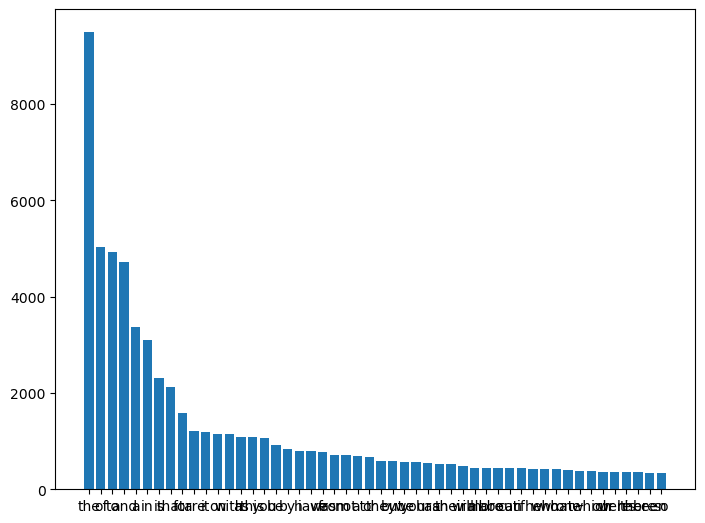

In [49]:
##### -- Imports -- #####
import matplotlib.pyplot as plt 
import itertools

##### -- Functions -- #####
def wordDic(data):
    file = open(data, 'r')
    read = file.read().lower()
    words = read.split()  
    dictionary = {}
    for i in words:
        if i in dictionary:
            dictionary[i] += 1  
        else:
            dictionary[i] = 1
    return dictionary  

def plot (data):
    Sort = dict(sorted(wordDic(data).items(), key=lambda x: x[1], reverse=True))
    plotDictionary = dict(itertools.islice(Sort.items(), 50))
    axis = plt.figure().add_axes([0,0,1,1])
    x = list((plotDictionary).keys())
    y = list((plotDictionary).values())
    axis.bar(x, y)
    plt.show()

##### -- Calls -- #####
print ("Number of unique words: " + str(len(wordDic('news_sample.csv'))))
plot('news_sample.csv')
